<a href="https://colab.research.google.com/github/gabsrcha/Telecom_X_Analysis_pt_2/blob/main/Telecom_X_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_json('/content/drive/MyDrive/01. ALURA/Espec DATA/TelecomX_Data.json')
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

display(customer_df.head())
display(phone_df.head())
display(internet_df.head())
display(account_df.head())
df_flattened = df.merge(customer_df, left_index=True, right_index=True)
df_flattened = df_flattened.merge(phone_df, left_index=True, right_index=True)
df_flattened = df_flattened.merge(internet_df, left_index=True, right_index=True)
df_flattened = df_flattened.merge(account_df, left_index=True, right_index=True)

display(df_flattened.head())

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
df_flattened.drop(columns = ['customerID', 'customer',	'phone',	'internet',	'account'], inplace = True)

In [5]:
df_flattened

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [6]:
df_flattened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [7]:
df = df_flattened.copy()
fix = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in fix:
  df[col] = df[col].replace({'No internet service': 'No'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [9]:
df['Charges.Total'] = df['Charges.Total'].replace(' ', None)
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [11]:
object_columns = df.select_dtypes(include='object').columns.to_list()
print(object_columns)

['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [28]:
ndf = pd.get_dummies(df, columns = object_columns, drop_first=True)

In [29]:
ndf

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn_No,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.60,593.30,True,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.90,542.40,True,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.90,280.85,False,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.00,1237.85,False,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.90,267.40,False,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,13,55.15,742.90,True,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7263,0,22,85.10,1873.70,False,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7264,0,2,50.30,92.75,True,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7265,0,67,67.85,4627.65,True,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [30]:
ndf.isna().sum()

,0
SeniorCitizen,0
tenure,0
Charges.Monthly,0
Charges.Total,11
Churn_No,0
Churn_Yes,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0


In [31]:
ndf.dropna(subset = 'Charges.Total', inplace = True)

In [32]:
ndf.isnull().sum()

,0
SeniorCitizen,0
tenure,0
Charges.Monthly,0
Charges.Total,0
Churn_No,0
Churn_Yes,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0


In [33]:
pd.crosstab(ndf['Churn_Yes'], ndf['Churn_No'], normalize = True)

Churn_No,False,True
Churn_Yes,,
False,0.030871,0.711549
True,0.257580,0.000000


In [34]:
# from sklearn.preprocessing import MinMaxScaler

# colunas_numericas = ndf.select_dtypes(include=['int64', 'float64']).columns

# scaler = MinMaxScaler()

# ndf[colunas_numericas] = scaler.fit_transform(ndf[colunas_numericas])

# ndf.head()

In [35]:
corr = ndf.corr()

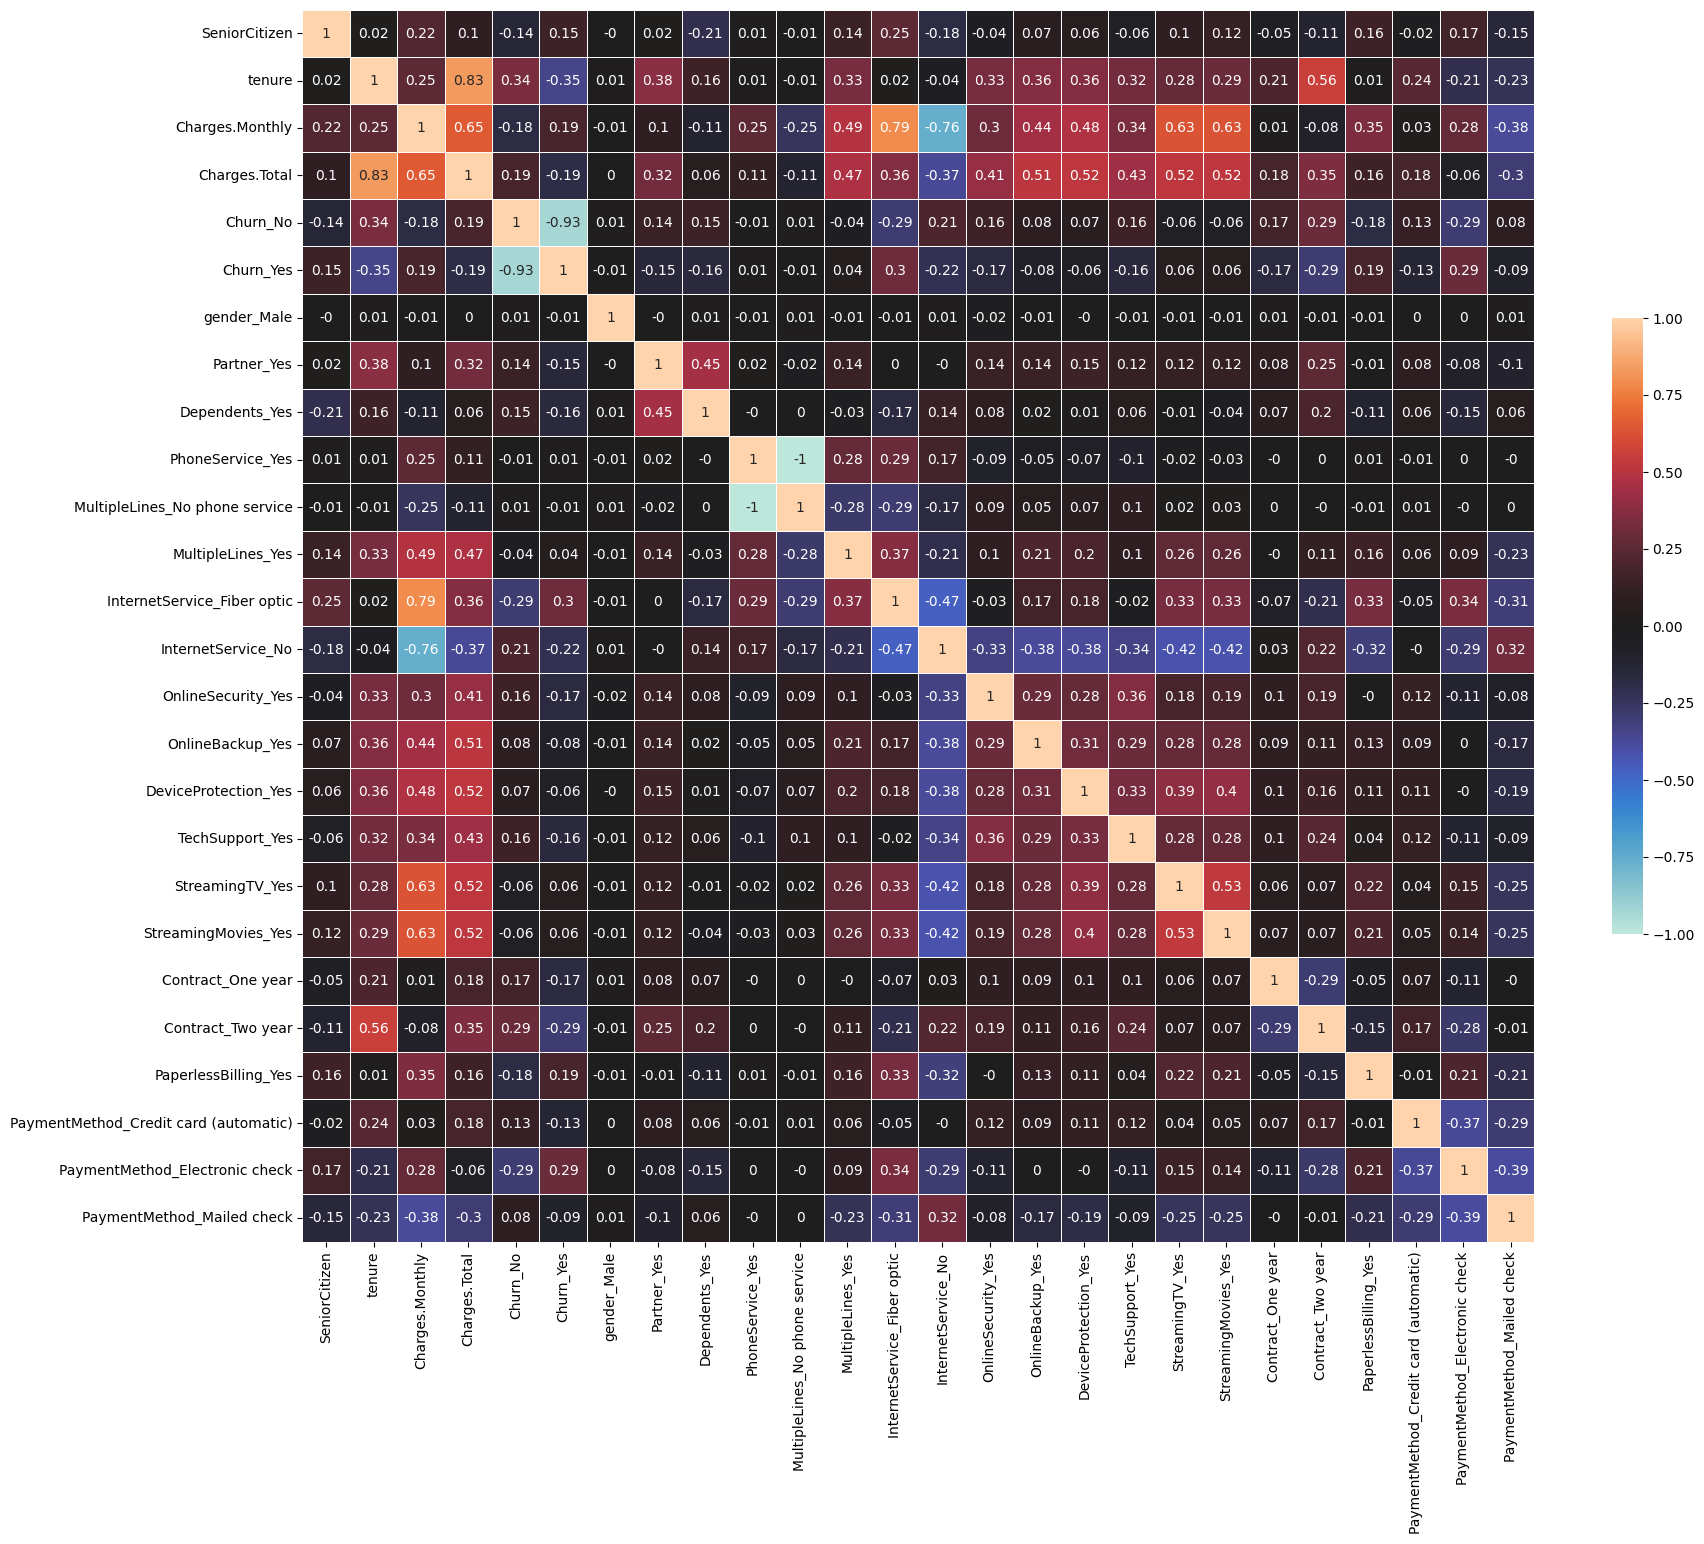

In [36]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

In [37]:
limiar = 0.2

variaveis_relevantes = corr.index[abs(corr['Churn_Yes']) >= limiar].tolist()
if 'Churn_Yes' not in variaveis_relevantes:
    variaveis_relevantes.append('Churn_Yes')

corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))


In [38]:
corr_filtrada

,tenure,Churn_No,Churn_Yes,InternetService_Fiber optic,InternetService_No,Contract_Two year,PaymentMethod_Electronic check
tenure,1.000000,0.336071,-0.345799,0.019082,-0.035545,0.562783,-0.208832
Churn_No,0.336071,1.000000,-0.925119,-0.291985,0.211274,0.288160,-0.286869
Churn_Yes,-0.345799,-0.925119,1.000000,0.300416,-0.223755,-0.294467,0.294181
InternetService_Fiber optic,0.019082,-0.291985,0.300416,1.000000,-0.467424,-0.211462,0.339092
InternetService_No,-0.035545,0.211274,-0.223755,-0.467424,1.000000,0.220978,-0.287659
Contract_Two year,0.562783,0.288160,-0.294467,-0.211462,0.220978,1.000000,-0.282395
PaymentMethod_Electronic check,-0.208832,-0.286869,0.294181,0.339092,-0.287659,-0.282395,1.000000


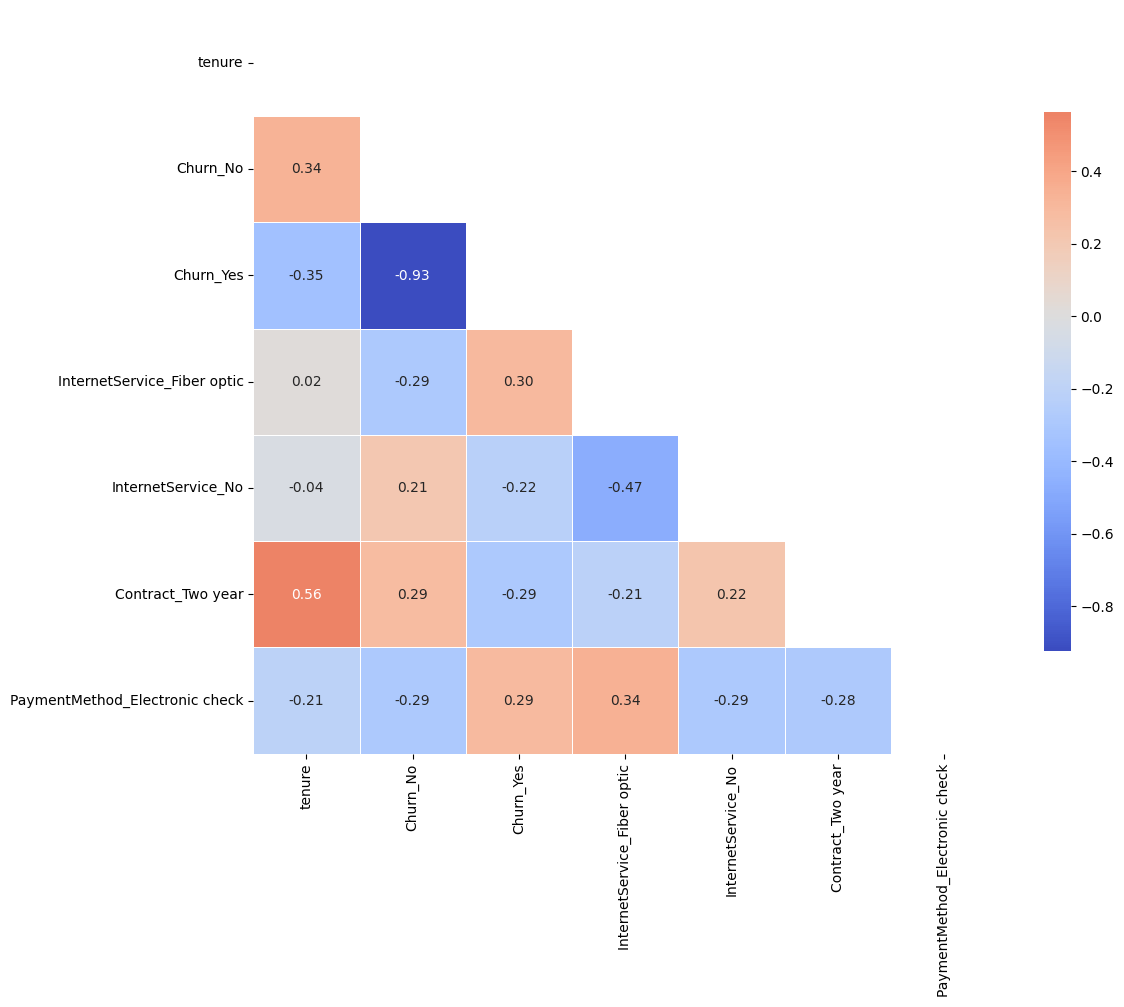

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.show()

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [41]:
X = ndf.drop(columns=['Churn_Yes', 'Churn_No'])
X_const = add_constant(X)

In [42]:
X_const = X_const.astype(float)

In [43]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif['Variaveis'] = X_const.columns
display(vif.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF,Variaveis
8,inf,PhoneService_Yes
9,inf,MultipleLines_No phone service
3,872.488197,Charges.Monthly
11,149.253496,InternetService_Fiber optic
12,105.055970,InternetService_No
18,24.249121,StreamingMovies_Yes
17,24.146092,StreamingTV_Yes
4,10.832700,Charges.Total
2,7.580478,tenure
10,7.317710,MultipleLines_Yes


In [50]:
X2 = X_const.copy()
X2.drop(columns = ['PhoneService_Yes', 'MultipleLines_No phone service', 'Charges.Monthly'], inplace = True)
X2 = X2.astype(float)

In [51]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['Variaveis'] = X2.columns
display(vif.sort_values(by='VIF', ascending=False))

,VIF,Variaveis
0,17.206810,const
3,10.275157,Charges.Total
2,7.210918,tenure
17,2.647706,Contract_Two year
9,2.498015,InternetService_No
8,2.269408,InternetService_Fiber optic
20,1.978858,PaymentMethod_Electronic check
21,1.858129,PaymentMethod_Mailed check
15,1.722939,StreamingMovies_Yes
14,1.714730,StreamingTV_Yes


In [56]:
var = [vari for vari in X2.columns.to_list() if vari!= 'const']

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [59]:
X = ndf[var]
y = ndf['Churn_Yes']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)
X_train_sn, y_train_sn = smote.fit_resample(X_train, y_train)

In [63]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Regressão Logística
Acurácia: 0.7574644005512172
ROC AUC: 0.8434268059158856
Matriz de Confusão:
 [[1201  415]
 [ 113  448]]
              precision    recall  f1-score   support

       False       0.91      0.74      0.82      1616
        True       0.52      0.80      0.63       561

    accuracy                           0.76      2177
   macro avg       0.72      0.77      0.72      2177
weighted avg       0.81      0.76      0.77      2177



In [80]:
coef = pd.Series(lr.coef_[0], index=X.columns)
print("Coeficientes da Regressão Logística:")
print(coef.sort_values(ascending=False))


Coeficientes da Regressão Logística:
Charges.Total                            0.838065
PaperlessBilling_Yes                     0.245601
InternetService_Fiber optic              0.243525
PaymentMethod_Electronic check           0.178074
StreamingMovies_Yes                      0.143407
StreamingTV_Yes                          0.110429
MultipleLines_Yes                        0.109401
SeniorCitizen                            0.084251
Partner_Yes                              0.036288
PaymentMethod_Mailed check               0.017955
PaymentMethod_Credit card (automatic)   -0.021536
DeviceProtection_Yes                    -0.024071
gender_Male                             -0.032510
Dependents_Yes                          -0.120429
OnlineBackup_Yes                        -0.124322
OnlineSecurity_Yes                      -0.185307
TechSupport_Yes                         -0.217089
Contract_One year                       -0.363506
InternetService_No                      -0.410503
Contract_Two 

In [69]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)
# rf.fit(X_train_sn, y_train_sn) #sem normalização, não melhorou acc
# rf.fit(X_train, y_train) # sem balanceamento, nao melhorou, mas melhor que sn
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Acurácia: 0.7795130914101975
ROC AUC: 0.8236976271156529
Matriz de Confusão:
 [[1377  239]
 [ 241  320]]
              precision    recall  f1-score   support

       False       0.85      0.85      0.85      1616
        True       0.57      0.57      0.57       561

    accuracy                           0.78      2177
   macro avg       0.71      0.71      0.71      2177
weighted avg       0.78      0.78      0.78      2177



In [83]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
print("Importância das variáveis no Random Forest:")
print(importances.sort_values(ascending=False))


Importância das variáveis no Random Forest:
Charges.Total                            0.183509
tenure                                   0.178119
InternetService_Fiber optic              0.084816
PaymentMethod_Electronic check           0.053012
Contract_Two year                        0.051334
PaperlessBilling_Yes                     0.045537
OnlineSecurity_Yes                       0.037934
Contract_One year                        0.036061
gender_Male                              0.033443
InternetService_No                       0.031904
TechSupport_Yes                          0.031680
Partner_Yes                              0.031548
MultipleLines_Yes                        0.027864
OnlineBackup_Yes                         0.027197
StreamingTV_Yes                          0.025788
StreamingMovies_Yes                      0.024808
DeviceProtection_Yes                     0.023549
Dependents_Yes                           0.022555
SeniorCitizen                            0.020091
Paymen

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train_bal, y_train_bal)

y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

print("K-Nearest Neighbors")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors
Acurácia: 0.6931557188791916
ROC AUC: 0.7485869910520464
Matriz de Confusão:
 [[1130  486]
 [ 182  379]]
              precision    recall  f1-score   support

       False       0.86      0.70      0.77      1616
        True       0.44      0.68      0.53       561

    accuracy                           0.69      2177
   macro avg       0.65      0.69      0.65      2177
weighted avg       0.75      0.69      0.71      2177



In [ ]:
# from sklearn.inspection import permutation_importance
# r = permutation_importance(knn, X, y, n_repeats=10, random_state=42)

# print("Importância das variáveis no KNN:")
# for i in r.importances_mean.argsort()[::-1]:
#     print(f"{X.columns[i]}: {r.importances_mean[i]:.3f}")

In [73]:
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_bal, y_train_bal)

y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]

print("\nSupport Vector Machines")
print("Acurácia:", accuracy_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_prob_svm))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machines
Acurácia: 0.7643546164446486
ROC AUC: 0.8235718792467482
Matriz de Confusão:
 [[1266  350]
 [ 163  398]]
              precision    recall  f1-score   support

       False       0.89      0.78      0.83      1616
        True       0.53      0.71      0.61       561

    accuracy                           0.76      2177
   macro avg       0.71      0.75      0.72      2177
weighted avg       0.79      0.76      0.77      2177



In [84]:
svm_coef = pd.Series(svm.coef_[0], index=X.columns)
print("Coeficientes das variáveis no SVM Linear:")
print(svm_coef.sort_values(ascending=False))


AttributeError: coef_ is only available when using a linear kernel

In [79]:
import lightgbm as lgb

# LightGBM Model
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train_bal, y_train_bal)

y_pred_lgbm = lgbm.predict(X_test_scaled)
y_prob_lgbm = lgbm.predict_proba(X_test_scaled)[:, 1]

print("LightGBM")
print("Acurácia:", accuracy_score(y_test, y_pred_lgbm))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lgbm))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lgbm))
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 3771, number of negative: 3771
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1956
[LightGBM] [Info] Number of data points in the train set: 7542, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM
Acurácia: 0.7969683050068902
ROC AUC: 0.8374201390727308
Matriz de Confusão:
 [[1397  219]
 [ 223  338]]
              precision    recall  f1-score   support

       False       0.86      0.86      0.86      1616
        True       0.61      0.60      0.60       561

    accuracy                           0.80      2177
   macro avg       0.73      0.73      0.73      2177
weighted avg       0.80      0.80      0.80      2177



In [86]:
importance = pd.Series(lgbm.feature_importances_, index=X.columns)
print("Importância das variáveis no LightGBM:")
print(importance.sort_values(ascending=False))


Importância das variáveis no LightGBM:
Charges.Total                            654
tenure                                   636
gender_Male                              130
OnlineBackup_Yes                         121
OnlineSecurity_Yes                       119
PaperlessBilling_Yes                     113
TechSupport_Yes                          109
InternetService_Fiber optic              102
MultipleLines_Yes                        102
StreamingMovies_Yes                      101
DeviceProtection_Yes                      96
PaymentMethod_Electronic check            95
StreamingTV_Yes                           94
Partner_Yes                               90
PaymentMethod_Credit card (automatic)     79
Dependents_Yes                            72
SeniorCitizen                             68
Contract_One year                         67
Contract_Two year                         56
PaymentMethod_Mailed check                56
InternetService_No                        40
dtype: int32


In [77]:
import xgboost as xgb

# XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_bal, y_train_bal)

y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

print("XGBoost")
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:49:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost
Acurácia: 0.7776757005052825
ROC AUC: 0.824894437973209
Matriz de Confusão:
 [[1386  230]
 [ 254  307]]
              precision    recall  f1-score   support

       False       0.85      0.86      0.85      1616
        True       0.57      0.55      0.56       561

    accuracy                           0.78      2177
   macro avg       0.71      0.70      0.71      2177
weighted avg       0.77      0.78      0.78      2177



In [85]:
importances = xgb_model.feature_importances_
imp_df = pd.Series(importances, index=X.columns)
print("Importância das variáveis no XGBoost:")
print(imp_df.sort_values(ascending=False))


Importância das variáveis no XGBoost:
Contract_Two year                        0.232537
InternetService_Fiber optic              0.164195
Contract_One year                        0.123605
InternetService_No                       0.052931
StreamingMovies_Yes                      0.036139
TechSupport_Yes                          0.035611
OnlineSecurity_Yes                       0.035267
PaperlessBilling_Yes                     0.034378
StreamingTV_Yes                          0.033018
tenure                                   0.030647
MultipleLines_Yes                        0.029069
PaymentMethod_Electronic check           0.026810
Partner_Yes                              0.025332
OnlineBackup_Yes                         0.025168
gender_Male                              0.024242
Dependents_Yes                           0.021305
DeviceProtection_Yes                     0.019245
PaymentMethod_Credit card (automatic)    0.015699
SeniorCitizen                            0.012408
PaymentMetho


## 1. Descrição das Variáveis Analisadas

O dataset foi normalizado em diferentes dimensões:
- **customer_df**: Informações demográficas dos clientes (`gender`, `SeniorCitizen`, `Partner`, `Dependents`, `tenure`)
- **phone_df**: Perfil de serviço telefônico (`PhoneService`, `MultipleLines`)
- **internet_df**: Perfil de serviço de internet e adicionais (`InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`)
- **account_df**: Perfil de contrato e cobrança (`Contract`, `PaperlessBilling`, `PaymentMethod`, `Charges.Monthly`, `Charges.Total`)

---

## 2. Principais Fatores que Afetam a Evasão

### a) Tipo de Contrato
- **Contratos Month-to-month (mensal)** exibem taxas de evasão significativamente maiores em relação a contratos anuais ou bienais.
- Clientes com contratos de longo prazo tendem a permanecer mais tempo.

**Estratégia:** Oferecer benefícios para migração de clientes do modelo mensal para contratos de maior duração (ex: descontos, bônus).

---

### b) Serviços de Segurança e Apoio
- **OnlineSecurity** e **TechSupport**: Clientes que não possuem esses serviços apresentam maior propensão à evasão.
- A ausência de pacotes de segurança digital e suporte técnico aumenta o risco de churn.

**Estratégia:** Criar pacotes promocionais que incluam serviços de segurança e suporte com preços acessíveis para clientes em risco.

---

### c) Forma de Pagamento
- **Electronic Check** está associada à maior evasão, enquanto métodos automáticos (Credit Card, Bank Transfer) apresentam menor churn.
- Problemas e insatisfação com o processo de pagamento podem impulsionar a saída.

**Estratégia:** Estimular o uso de meios de pagamento automáticos e oferecer facilidades para a troca do método de pagamento.

---

### d) Faturamento e Cobrança
- **PaperlessBilling**: A cobrança eletrônica está associada a maior churn, possivelmente pela menor percepção do valor do serviço ou dificuldade de acompanhamento.
- **Charges.Monthly**: Clientes com cobranças mensais mais altas tendem a evadir com maior frequência, especialmente se não percebem valor agregado.

**Estratégia:** Revisar políticas de cobrança, oferecer descontos progressivos ou cashback para clientes fiéis e criar campanhas de valorização do serviço.

---

### e) Tempo de Relacionamento (Tenure)
- Clientes com **tenure baixo** têm probabilidade maior de evasão.

**Estratégia:** Programas de onboarding, contato proativo nas primeiras interações, acompanhamento personalizado no primeiro ano.

---

### f) Perfil Demográfico
- **SeniorCitizen**: Clientes idosos tendem a evadir mais, possivelmente pela dificuldade de adaptação ou uso dos serviços.
- **Dependents**: Clientes sem dependentes apresentam maior propensão ao churn.

**Estratégia:** Oferecer treinamento digital, linha de atendimento dedicada e benefícios para clientes idosos e familiares.

---

## 3. Desempenho dos Modelos

Os modelos aplicados (ex: Random Forest, XGBoost, Logistic Regression) apontaram os seguintes fatores como mais relevantes para prever evasão:

- **Contract**: Importância máxima em todos os modelos.
- **tenure**: Forte correlação negativa com churn.
- **OnlineSecurity** e **TechSupport**: Relevância alta.
- **PaymentMethod** e **PaperlessBilling**: Impacto moderado.
- **Charges.Monthly**: Importância contextual (principalmente em clientes com tenure baixo).

Os modelos tiveram acurácia média de 0.79 a 0.83, com maior desempenho para árvores de decisão (Random Forest/XGBoost), que destacam a interação entre múltiplos fatores.


## 4. Recomendações Finais

- A evasão de clientes está fortemente ligada ao tipo de contrato, tempo de casa, ausência de serviços adicionais, forma de pagamento e perfil demográfico.
- Estratégias de retenção devem ser orientadas por dados, buscando antecipar o churn e agir proativamente.
- Recomenda-se o monitoramento contínuo dos fatores identificados e a experimentação de campanhas segmentadas para validar as ações propostas.

---